In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

574

In [6]:
cities

['airai',
 'richards bay',
 'salekhard',
 'partizanskoye',
 'chegdomyn',
 'ushuaia',
 'kavieng',
 'port alfred',
 'ponta delgada',
 'hilo',
 'nome',
 'ponta do sol',
 'chokurdakh',
 'nhulunbuy',
 'vanavara',
 'belushya guba',
 'buchanan',
 'kaniama',
 'kudahuvadhoo',
 'tsihombe',
 'illoqqortoormiut',
 'beringovskiy',
 'khatanga',
 'kalmunai',
 'hasaki',
 'biak',
 'faanui',
 'satitoa',
 'samarai',
 'rikitea',
 'warqla',
 'dungarpur',
 'azul',
 'atuona',
 'lebu',
 'dikson',
 'caravelas',
 'san patricio',
 'alofi',
 'jamestown',
 'menongue',
 'punta arenas',
 'saskylakh',
 'lata',
 'nicoya',
 'vaini',
 'upernavik',
 'sobolevo',
 'qaqortoq',
 'lianyuan',
 'tocache',
 'moron',
 'rocha',
 'new ulm',
 'kavaratti',
 'healdsburg',
 'nabire',
 'vao',
 'broome',
 'saint-philippe',
 'flinders',
 'bengkalis',
 'padang',
 'qaanaaq',
 'oranjemund',
 'ancud',
 'hermanus',
 'kamenka',
 'hithadhoo',
 'tulun',
 'tuktoyaktuk',
 'ribeira grande',
 'dhidhdhoo',
 'ilulissat',
 'albany',
 'arraial do cabo',
 

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
# enumerate() method as an alternative way to iterate through the list of cities and retrieve both the index, and the city from the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | richards bay
Processing Record 3 of Set 1 | salekhard
Processing Record 4 of Set 1 | partizanskoye
Processing Record 5 of Set 1 | chegdomyn
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | ponta delgada
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | nome
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | nhulunbuy
Processing Record 15 of Set 1 | vanavara
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | buchanan
Processing Record 18 of Set 1 | kaniama
Processing Record 19 of Set 1 | kudahuvadhoo
Processing Record 20 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 21 of Set 1 | illoqqortoormiut
Cit

Processing Record 38 of Set 4 | baboua
City not found. Skipping...
Processing Record 39 of Set 4 | abatskoye
Processing Record 40 of Set 4 | hamilton
Processing Record 41 of Set 4 | alba iulia
Processing Record 42 of Set 4 | coquimbo
Processing Record 43 of Set 4 | bunbury
Processing Record 44 of Set 4 | santa maria
Processing Record 45 of Set 4 | saryshagan
City not found. Skipping...
Processing Record 46 of Set 4 | ostrovnoy
Processing Record 47 of Set 4 | puerto ayora
Processing Record 48 of Set 4 | castro
Processing Record 49 of Set 4 | tura
Processing Record 50 of Set 4 | necochea
Processing Record 1 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 5 | klyuchi
Processing Record 3 of Set 5 | hovd
Processing Record 4 of Set 5 | port lincoln
Processing Record 5 of Set 5 | kahului
Processing Record 6 of Set 5 | banamba
Processing Record 7 of Set 5 | nguiu
City not found. Skipping...
Processing Record 8 of Set 5 | cabedelo
Processing Record 9 of 

Processing Record 24 of Set 8 | nchelenge
Processing Record 25 of Set 8 | port elizabeth
Processing Record 26 of Set 8 | vardo
Processing Record 27 of Set 8 | terenos
Processing Record 28 of Set 8 | mackay
Processing Record 29 of Set 8 | youkounkoun
Processing Record 30 of Set 8 | khasan
Processing Record 31 of Set 8 | lalmohan
Processing Record 32 of Set 8 | saint anthony
Processing Record 33 of Set 8 | salinas
Processing Record 34 of Set 8 | talnakh
Processing Record 35 of Set 8 | evensk
Processing Record 36 of Set 8 | norman wells
Processing Record 37 of Set 8 | chaoyang
Processing Record 38 of Set 8 | bandundu
Processing Record 39 of Set 8 | acapulco
Processing Record 40 of Set 8 | tongliao
Processing Record 41 of Set 8 | saint george
Processing Record 42 of Set 8 | bismarck
Processing Record 43 of Set 8 | sao felix do xingu
Processing Record 44 of Set 8 | bargal
City not found. Skipping...
Processing Record 45 of Set 8 | santa rosa
Processing Record 46 of Set 8 | muncie
Processing

Processing Record 11 of Set 12 | kiunga
Processing Record 12 of Set 12 | hays
Processing Record 13 of Set 12 | the valley
Processing Record 14 of Set 12 | carbonear
Processing Record 15 of Set 12 | pangody
Processing Record 16 of Set 12 | port hardy
Processing Record 17 of Set 12 | rawson
Processing Record 18 of Set 12 | yulara
Processing Record 19 of Set 12 | harper
Processing Record 20 of Set 12 | oktyabrskoye
Processing Record 21 of Set 12 | zonguldak
Processing Record 22 of Set 12 | jizan
Processing Record 23 of Set 12 | nelson bay
Processing Record 24 of Set 12 | kvarkeno
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
len(city_data)

526

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Airai,-8.9266,125.4092,61.21,99,100,0.92,TL,2022-01-19 07:36:00
1,Richards Bay,-28.7830,32.0377,80.15,70,100,4.79,ZA,2022-01-19 07:36:00
2,Salekhard,66.5300,66.6019,-4.07,98,100,0.29,RU,2022-01-19 07:36:01
3,Partizanskoye,55.5006,94.3900,16.72,96,86,2.28,RU,2022-01-19 07:36:01
4,Chegdomyn,51.1167,133.0167,-14.91,100,56,1.36,RU,2022-01-19 07:36:01
5,Ushuaia,-54.8000,-68.3000,46.06,76,75,19.57,AR,2022-01-19 07:33:26
6,Kavieng,-2.5744,150.7967,80.35,82,100,21.12,PG,2022-01-19 07:36:02
7,Port Alfred,-33.5906,26.8910,71.92,63,50,12.21,ZA,2022-01-19 07:34:35
8,Ponta Delgada,37.7333,-25.6667,60.49,94,75,9.22,PT,2022-01-19 07:33:04
9,Hilo,19.7297,-155.0900,71.33,87,0,4.61,US,2022-01-19 07:33:15


In [14]:
#reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
reordered_city_data_df = city_data_df[new_column_order]
reordered_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Airai,TL,2022-01-19 07:36:00,-8.9266,125.4092,61.21,99,100,0.92
1,Richards Bay,ZA,2022-01-19 07:36:00,-28.7830,32.0377,80.15,70,100,4.79
2,Salekhard,RU,2022-01-19 07:36:01,66.5300,66.6019,-4.07,98,100,0.29
3,Partizanskoye,RU,2022-01-19 07:36:01,55.5006,94.3900,16.72,96,86,2.28
4,Chegdomyn,RU,2022-01-19 07:36:01,51.1167,133.0167,-14.91,100,56,1.36
5,Ushuaia,AR,2022-01-19 07:33:26,-54.8000,-68.3000,46.06,76,75,19.57
6,Kavieng,PG,2022-01-19 07:36:02,-2.5744,150.7967,80.35,82,100,21.12
7,Port Alfred,ZA,2022-01-19 07:34:35,-33.5906,26.8910,71.92,63,50,12.21
8,Ponta Delgada,PT,2022-01-19 07:33:04,37.7333,-25.6667,60.49,94,75,9.22
9,Hilo,US,2022-01-19 07:33:15,19.7297,-155.0900,71.33,87,0,4.61


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

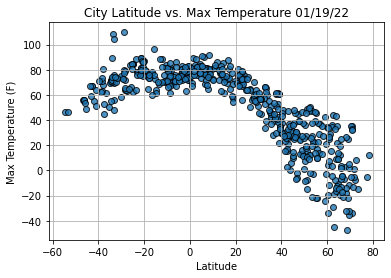

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()